# Assignment: 7

Assignment on Decision Tree.

Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.

Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions

The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.

a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.

b) Perform data-preparation (Train-Test Split)

c) Apply Machine Learning Algorithm

d) Evaluate Model.

**Dataset Used:** Admission_Predict

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [33]:
# Load Dataset
df = pd.read_csv("Admission_Predict.csv")

# Display first few rows of dataset
display(df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
# Checking for missing values
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [35]:
# Converting 'Chance of Admit' into binary classification
df['Admitted'] = (df['Chance of Admit '] >= 0.5).astype(int)

# Selecting features and target variable
X = df[["GRE Score", "CGPA"]]  # Academic performance indicators
y = df["Admitted"]  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.9
Confusion Matrix:
 [[ 5  5]
 [ 3 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.93      0.96      0.94        70

    accuracy                           0.90        80
   macro avg       0.78      0.73      0.75        80
weighted avg       0.89      0.90      0.90        80



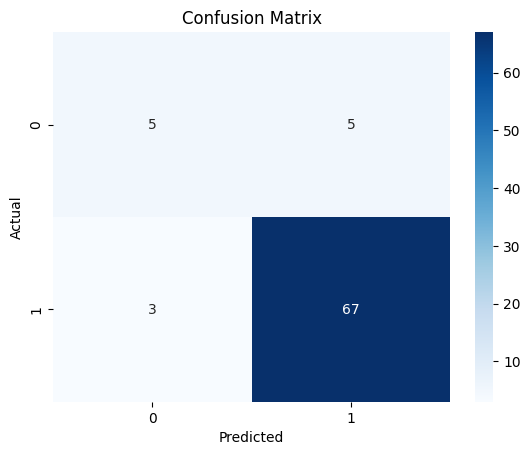

In [36]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

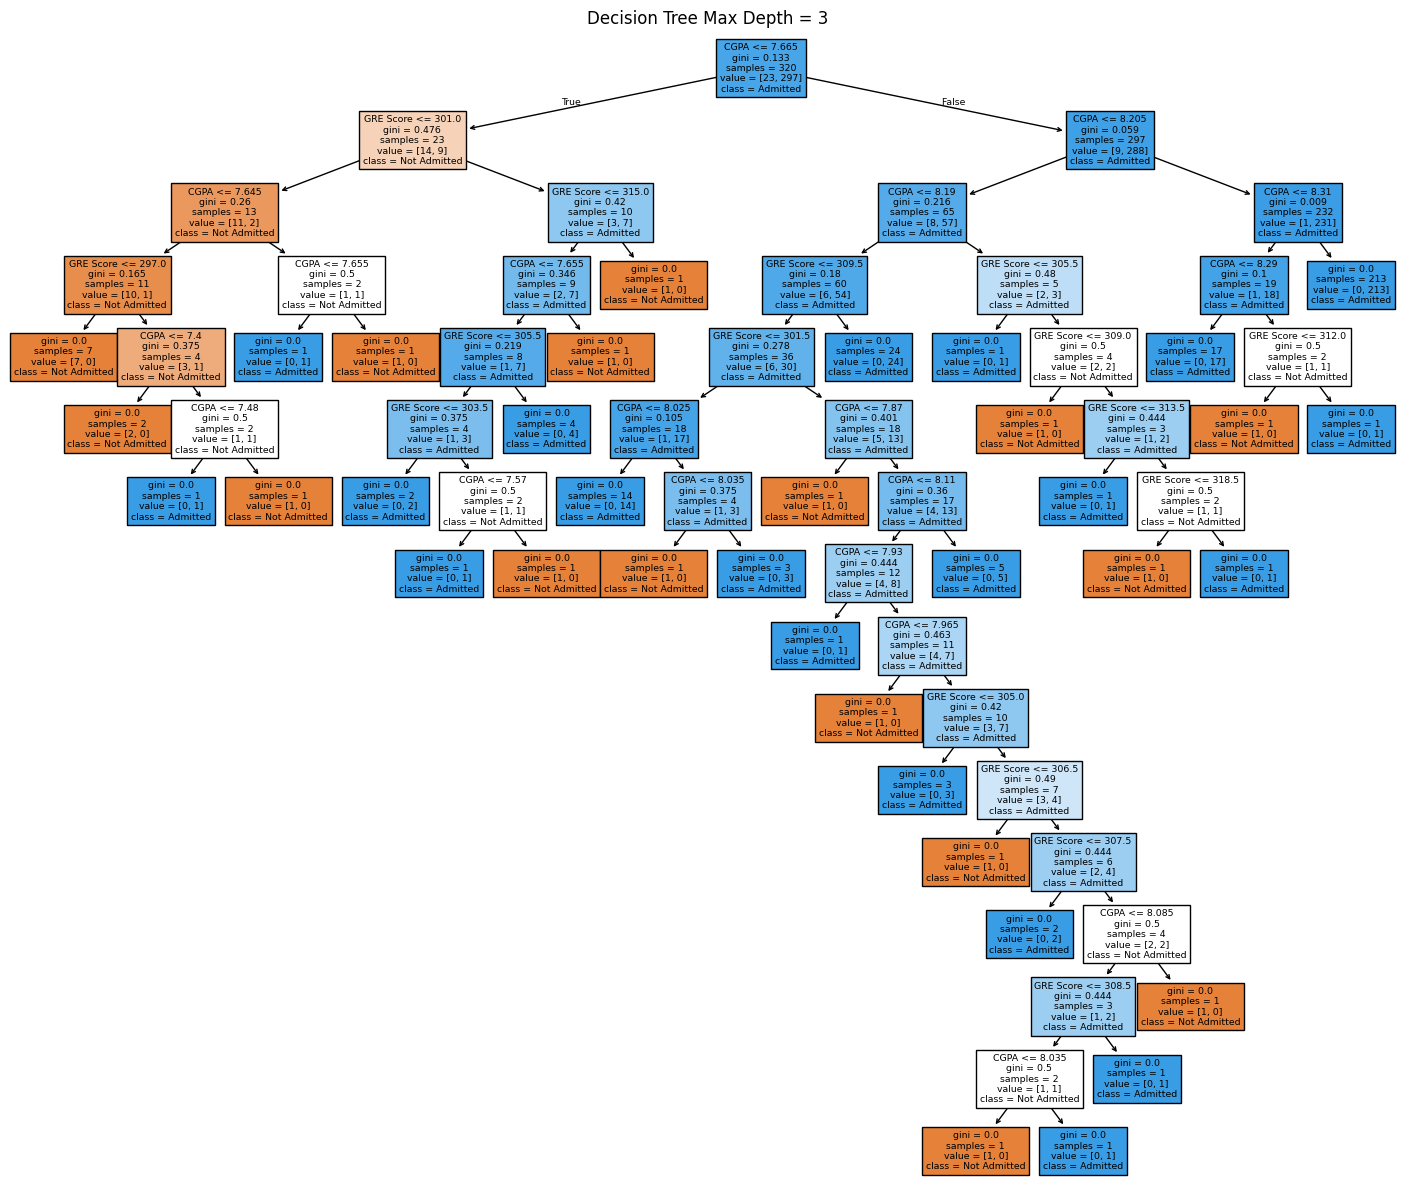

In [37]:
plt.figure(figsize=(18, 15))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()